## Chapter 1.9b: Fault relations
***
In this scenario a fault is offsetting a younger fault in a setting of horzontally stacked layers.

Let's start as always by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline

# Aux imports
import numpy as np
import pandas as pn
import matplotlib
import theano
import qgrid

#%matplotlib widget

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


We import a model from an existing folder.

In [2]:
geo_model = gp.load_model('Tutorial_ch1-9b_Fault_relations')

In [3]:
geo_model.surfaces.colors.update_colors()

{'fault2': '#015482', 'fault1': '#9f0052', 'rock4': '#ffbe00', 'rock3': '#728f02', 'rock2': '#443988', 'rock1': '#ff3f20', 'basement': '#325916'}


In [4]:
geo_model.surfaces.df = geo_model.surfaces.df.reindex(geo_model.surfaces._columns, axis=1)

In [5]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
7,fault2,fault_series2,1,False,#015482,1
5,fault1,fault_series1,1,False,#9f0052,2
6,rock4,series1,1,False,#ffbe00,3
0,rock3,series1,2,False,#728f02,4
3,rock2,series1,3,False,#443988,5
1,rock1,series1,4,False,#ff3f20,6
4,basement,basement_series,1,True,#325916,7


In [6]:
geo_model.additional_data.kriging_data.df

,range,$C_o$,drift equations,nugget grad,nugget scalar
values,1732.050808,71428.571429,[3 3 3],0.01,0.000001


In [7]:
geo_model.modify_kriging_parameters('drift equations', geo_model.get_additional_data()['values']['Kriging', 'drift equations'],
                                   u_grade_sep=' ')

In [8]:
geo_model.rescaling.rescale_data()

True

In [9]:
geo_model.additional_data

values
Structure isLith                                         True
          isFault                                        True
          number faults                                     2
          number surfaces                                   6
          number series                                     3
          number surfaces per series                [1, 1, 4]
          len surfaces surface_points  [9, 9, 15, 15, 12, 12]
          len series surface_points                [9, 9, 54]
          len series orientations                  [1, 1, 10]
Options   dtype                                       float64
          output                                      geology
          theano_optimizer                       fast_compile
          device                                          cpu
          verbosity                                       [0]
Kriging   range                                       1732.05
          $C_o$                                       71428.6
          drift equations                           [3, 3, 3]
          nugget grad                                    0.01
          nugget scalar                                 1e-06
Rescaling rescaling factor                               1600
          centers                      [500.0, 500.0, -650.0]

In [10]:
gp.activate_interactive_df(geo_model)

It is important to get df with get to update the models sinde the `activate_interactive` method is called

If necessary, functions to display input data:

In [11]:
#geo_model.qi.get('orientations')

In [43]:
geo_model.qi.get('surface_points')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Displaying the order of the different surfaces and series:

In [13]:
#geo_model.qi.get('surfaces')

In [14]:
geo_model.qi.get('series')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [15]:
geo_model.qi.get('faults')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [16]:
geo_model.qi.get('faults_relations')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Displaying the input data:

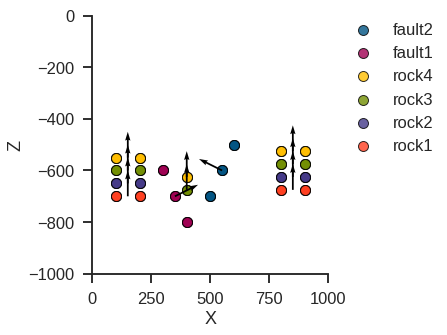

In [17]:
gp.plot.plot_data(geo_model, direction='y')

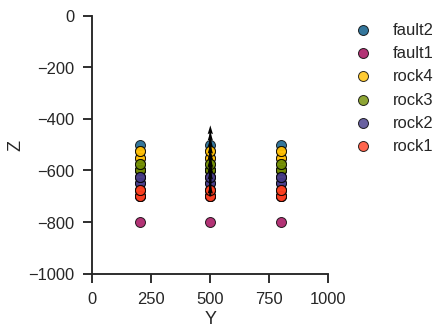

In [18]:
gp.plot.plot_data(geo_model, direction='x')

In [19]:
gp.set_interpolation_data(geo_model)

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,[0]


In [20]:
geo_model.series

,order_series,BottomRelation
fault_series2,1,Erosion
fault_series1,2,Erosion
series1,3,Erosion
basement_series,4,Erosion


In [21]:
geo_model.faults

,isFault,isFinite
fault_series2,True,False
fault_series1,True,False
series1,False,False
basement_series,False,False


In [22]:
geo_model.faults.faults_relations_df

,fault_series2,fault_series1,series1,basement_series
fault_series2,False,True,True,True
fault_series1,False,False,True,True
series1,False,False,False,False
basement_series,False,False,False,False


In [23]:
geo_model.set_bottom_relation(['fault_series2', 'fault_series1'], ['Fault', 'Fault'])

,order_series,BottomRelation
fault_series2,1,Fault
fault_series1,2,Fault
series1,3,Erosion
basement_series,4,Erosion


In [24]:
geo_model.interpolator.theano_graph.is_finite_ctrl.get_value()

array([0, 0, 0, 0], dtype=int32)

In [44]:
#geo_model.update_to_interpolator()
gp.compute_model(geo_model, compute_mesh=False)


Lithology ids 
  [0.         0.         0.         ... 6.49810606 6.49810606 6.49810606] 
Lithology scalar field 
  [[-0.0893697  -0.07818369 -0.06699775 ... -0.02780384 -0.02780384
  -0.02780384]
 [ 0.38010495  0.39127721  0.4024499  ...  0.64278456  0.64278456
   0.64278456]
 [ 0.16894208  0.19394179  0.21894149 ...  0.53143033  0.53143033
   0.53143033]] 

/home/miguel/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/miguel/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


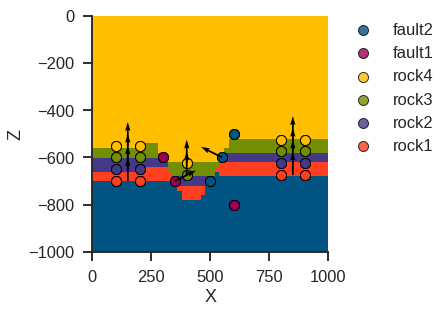

In [45]:
gp.plot.plot_section(geo_model, 25, block_type=geo_model.solutions.lith_block[:125000], plot_data=True)

In [28]:
geo_model.solutions.block_matrix

array([[[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ]],

       [[3.        , 3.        , 3.        , ..., 3.        ,
         3.        , 3.        ]],

       [[7.        , 7.        , 7.        , ..., 6.48106891,
         6.48106891, 6.48106891]]])

In [29]:
geo_model.solutions.block_matrix[1, 0, :125000]

array([3., 3., 3., ..., 2., 2., 2.])

In [40]:
geo_model.interpolator.theano_graph.offset.set_value(10)
gp.compute_model(geo_model, compute_mesh=False)


Lithology ids 
  [0.         0.         0.         ... 6.49884259 6.49884259 6.49884259] 
Lithology scalar field 
  [[-0.0893697  -0.07818369 -0.06699775 ... -0.02780384 -0.02780384
  -0.02780384]
 [-3.70002522 -3.68884035 -3.67765542 ... -3.43726636 -3.43726636
  -3.43726636]
 [ 0.26269604  0.28769588  0.31269571 ...  0.62518933  0.62518933
   0.62518933]] 

/home/miguel/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/miguel/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


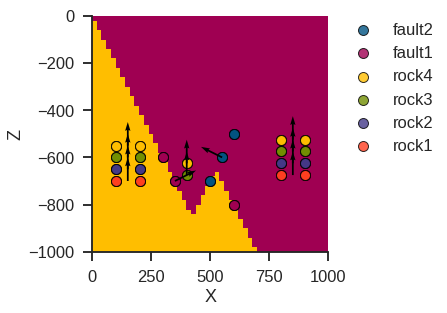

In [46]:
gp.plot.plot_section(geo_model, 25, block_type=geo_model.solutions.block_matrix[1, 0, :125000], plot_data=True)

In [31]:
geo_model.solutions.scalar_field_matrix[0, :125000]

array([-0.0893697 , -0.07818369, -0.06699775, ..., -0.65927113,
       -0.64808461, -0.63689809])

../../gempy/plot/visualization.py:373: FutureWarning: Passing the block directly will get deprecated in the next version. Please use Solutionand block_type instead
  'and block_type instead', FutureWarning)


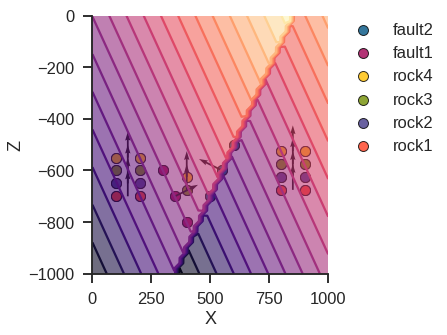

In [32]:
gp.plot.PlotData2D(geo_model).plot_scalar_field(geo_model.solutions.scalar_field_matrix[1, :125000], 25)

In [47]:
geo_model.save_model('Tutorial_ch1-9b_Fault_relations')

Directory already exists, files will be overwritten


True